# **Setup Steps** - Required
1. Uncomment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to uncomment the whole cell)
2. Run the first code cell to uninstall the conflicting packages.
3. Run the second code cell to install the package dependencies. This might take several minutes.
4. Restart the notebook runtime before continuing. To do so, open the `Runtime` menu and click `Restart runtime` in the drop-down menu as shown in the image below. Once the notebook kernel restarts do not run the first two code cells again.
![google-colab-restart-notebook-runtime](https://github.com/cj-mills/christianjmills/raw/master/images/icevision-openvino-unity-tutorial/google-colab-restart-notebook-runtime.png)
5. Re-comment the first two code cells (enter the code cell and press `Ctrl a` to highlight all and `Ctrl /` to comment the whole cell).
6. Execute the notebook starting from the `from icevision.all import *` cell.
7. You will know everything is working if the `from icevision.all import *` cell has the following output.
```text
INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31
```
8. Make sure you have a Kaggle API key so you can download the dataset from Kaggle. ([steps](https://christianjmills.com/Fastai-to-Unity-Tutorial-1/#configure-kaggle-api))

**Uninstall conflicting packages**

In [ ]:
# %%capture 
# !pip uninstall tensorflow -y
# !pip uninstall thinc -y
# !pip uninstall fastai -y
# !pip uninstall fastcore -y
# !pip uninstall spacy -y
# !pip uninstall en-core-web-sm -y
# !pip uninstall torchtext -y

**Install Dependencies**

In [ ]:
# %%capture
# !pip install -U torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install mmcv-full==1.3.17 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# !pip install mmdet==2.17.0
# !pip install icevision==0.11.0
# !pip install icedata==0.5.1
# !pip install -U setuptools==59.5.0
# !pip install openvino-dev
# !pip install distinctipy
# !pip install -U pillow
# !pip install -U numpy
# !pip install onnxruntime
# !pip install onnx-simplifier

# **Required:** Restart the notebook after installing dependencies and do not rerun the above code cells

**Import IceVision library**

In [1]:
# Import all the necessary modules from the icevision package
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /home/innom-dt/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Import the pandas package
import pandas as pd

# Set the max column width to None
pd.set_option('max_colwidth', None)

# Set the max number of rows and columns to None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Kaggle API
* [GitHub Repository](https://github.com/Kaggle/kaggle-api)
* [Documentation](https://github.com/Kaggle/kaggle-api#competitions)
* Install: `pip install kaggle`
* Need to get an API Key for your Kaggle account
    * [https://www.kaggle.com/me/account](https://www.kaggle.com/me/account)

**Enter Kaggle username and API token**

In [3]:
creds = '{"username":"innominate817","key":"ecd251fe774bd001fe5d1fa38e9ff600"}'

**Save Kaggle credentials if none are present**
* **Source:** [https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

In [4]:
# Set the path to the kaggle.json file
cred_path = Path('~/.kaggle/kaggle.json').expanduser()

# Check if the file already exists
if not cred_path.exists():
    # Create the directory if it does not exist
    cred_path.parent.mkdir(exist_ok=True)
    # Save the API key to the file
    cred_path.write_text(creds)
    # Set the file permissions to be readable and writable by the current user
    cred_path.chmod(0o600)

**Import Kaggle API**

In [5]:
# Import the API module from the kaggle package
from kaggle import api

**Define path to dataset**

In [6]:
# Import the URLs object from the fastai.data.external module
from fastai.data.external import URLs

In [7]:
# Set the name of the dataset
dataset_name = 'hagrid-sample-30k-384p'
# dataset_name = 'hagrid-sample-120k-384p'

# Construct the Kaggle dataset name by combining the username and dataset name
kaggle_dataset = f'innominate817/{dataset_name}'

# Get the path to the directory where datasets are stored
archive_dir = URLs.path()

# Create the path to the data directory
dataset_dir = archive_dir/'../data'

# Create the path to the zip file that contains the dataset
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')

# Create the path to the directory where the dataset will be extracted
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

**Define method to extract the dataset from an archive file**

In [8]:
def file_extract(fname, dest=None):
    """
    Extract the specified file to the destination directory using `tarfile` or `zipfile`.
    
    Args:
        fname (str): The path to the file to be extracted.
        dest (str): The path to the directory where the file will be extracted. If not specified, the file will be extracted to the same directory as the source file.
        
    Returns:
        None
        
    Raises:
        Exception: If the file has an unrecognized file extension.
    """
    # Set the destination directory to the parent directory of the file if not specified
    if dest is None: dest = Path(fname).parent
    
    # Convert the file path to a string
    fname = str(fname)
    
    # Check the file extension and extract the file using the appropriate module
    if fname.endswith('gz'):
        tarfile.open(fname, 'r:gz').extractall(dest)
    elif fname.endswith('zip'):
        zipfile.ZipFile(fname).extractall(dest)
    else:
        raise Exception(f'Unrecognized archive: {fname}')

**Download the dataset if it is not present**

In [9]:
# Check if the dataset zip file already exists
if not archive_path.exists():
    # Download the dataset from Kaggle
    api.dataset_download_cli(kaggle_dataset, path=archive_dir)
    
    # Extract the dataset zip file to the data directory
    file_extract(fname=archive_path, dest=dataset_dir)

In [10]:
# Create a list of the items in the 'dataset_path' directory
dir_content = list(dataset_path.ls())

# Get the path of the 'ann_train_val' directory
annotation_dir = dataset_path/'ann_train_val'

# Remove the 'ann_train_val' directory from the list of items
dir_content.remove(annotation_dir)

# Get the path of the remaining directory, which is assumed to be the image directory
img_dir = dir_content[0]

# Print the paths of the annotation and image directories
annotation_dir, img_dir

(Path('/home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val'),
 Path('/home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k'))

**Inspect the annotation folder**

In [11]:
# Get a list of files in the 'annotation_dir' directory
file_list = list(annotation_dir.ls())

# Display the names of the files using a Pandas DataFrame
pd.DataFrame([file.name for file in file_list])

0
0              call.json
1              palm.json
2              rock.json
3     stop_inverted.json
4            two_up.json
5              four.json
6             three.json
7              stop.json
8               one.json
9            three2.json
10   peace_inverted.json
11               ok.json
12             like.json
13             fist.json
14             mute.json
15            peace.json
16  two_up_inverted.json
17          dislike.json

**Inspect the image folder**

In [12]:
# Get a list of folders in the 'img_dir' directory
folder_list = list(img_dir.ls())

# Display the names of the folders using a Pandas DataFrame
pd.DataFrame([folder.name for folder in folder_list])

0
0                train_val_ok
1              train_val_mute
2              train_val_four
3            train_val_two_up
4   train_val_two_up_inverted
5               train_val_one
6           train_val_dislike
7              train_val_rock
8             train_val_three
9              train_val_palm
10           train_val_three2
11             train_val_fist
12    train_val_stop_inverted
13   train_val_peace_inverted
14             train_val_like
15             train_val_call
16             train_val_stop
17            train_val_peace

**Get image file paths**

In [13]:
# Get a list of image files in the 'img_dir' directory
files = get_image_files(img_dir)

# Print the number of image files in the list
len(files)

31833

**Inspect files**

In [14]:
# Get the first and last file in the 'files' list
file1, file2 = files[0], files[-1]

# Display the first and last files using a Pandas DataFrame
pd.DataFrame([file1, file2])

0
0             /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/00005c9c-3548-4a8f-9d0b-2dd4aff37fc9.jpg
1  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_two_up_inverted/fff4d2f6-9890-4225-8d9c-73a02ba8f9ac.jpg

**Inspect one of the training images**

Image Dims: (512, 384)


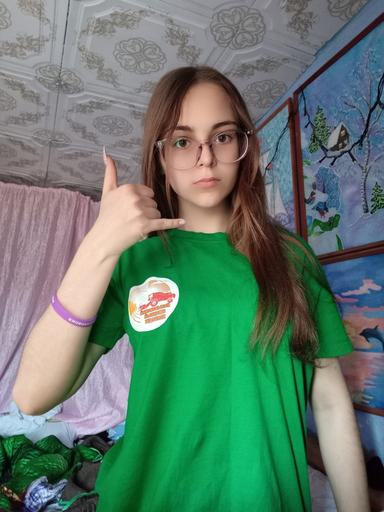

In [15]:
# Import the PIL library
import PIL

# Open the first file in the 'files' list as a RGB image
img = PIL.Image.open(files[0]).convert('RGB')

# Print the dimensions of the image
print(f"Image Dims: {img.shape}")

# Show the image
img

**Create a dictionary that maps image names to file paths**

In [16]:
# Create a dictionary where the keys are the filenames without the file extensions of the files in the 'files' list,
# and the values are the file paths
img_dict = {file.stem : file for file in files}

# Display the first five entries from the dictionary using a Pandas DataFrame
pd.DataFrame.from_dict(img_dict, orient='index').head()

0
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/00005c9c-3548-4a8f-9d0b-2dd4aff37fc9.jpg
0020a3db-82d8-47aa-8642-2715d4744db5  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/0020a3db-82d8-47aa-8642-2715d4744db5.jpg
004ac93f-0f7c-49a4-aadc-737e0ad4273c  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/004ac93f-0f7c-49a4-aadc-737e0ad4273c.jpg
006cac69-d3f0-47f9-aac9-38702d038ef1  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/006cac69-d3f0-47f9-aac9-38702d038ef1.jpg
00973fac-440e-4a56-b60c-2a06d5fb155d  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/00973fac-440e-4a56-b60c-2a06d5fb155d.jpg

**Get list of annotation file paths**

In [17]:
# Import the 'os' and 'glob' modules
import os
from glob import glob

In [18]:
# Get a list of paths to JSON files in the 'annotation_dir' directory
annotation_paths = glob(os.path.join(annotation_dir, "*.json"))

# Display the JSON file paths using a Pandas DataFrame
pd.DataFrame(annotation_paths)

0
0              /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/call.json
1              /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/palm.json
2              /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/rock.json
3     /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/stop_inverted.json
4            /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/two_up.json
5              /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/four.json
6             /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/three.json
7              /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/stop.json
8               /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/one.json
9            /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/three2.json
10   /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/peace_inverted.json
11               /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/ok.json
12             /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/like.json
13             /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/fist.json
14             /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/mute.json
15            /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/peace.json
16  /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/two_up_inverted.json
17          /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/ann_train_val/dislike.json

**Create annotations dataframe**

In [19]:
# Create a generator that yields Pandas DataFrames containing the data from each JSON file
cls_dataframes = (pd.read_json(f).transpose() for f in annotation_paths)

# Concatenate the DataFrames into a single DataFrame
annotation_df = pd.concat(cls_dataframes, ignore_index=False)

# Keep only the rows that correspond to the filenames in the 'img_dict' dictionary
annotation_df = annotation_df.loc[list(img_dict.keys())]

# Print the first 5 rows of the DataFrame
annotation_df.head()

bboxes  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9                                                                    [[0.23925175, 0.28595301, 0.25055143, 0.20777627]]   
0020a3db-82d8-47aa-8642-2715d4744db5                                                            [[0.5801012999999999, 0.53265105, 0.14562138, 0.12286348]]   
004ac93f-0f7c-49a4-aadc-737e0ad4273c                                                           [[0.46294793, 0.26419774, 0.13834939000000002, 0.10784189]]   
006cac69-d3f0-47f9-aac9-38702d038ef1                                                                    [[0.38799208, 0.44643898, 0.27068787, 0.18277858]]   
00973fac-440e-4a56-b60c-2a06d5fb155d  [[0.40980118, 0.38144198, 0.08338464, 0.06229785], [0.6122035100000001, 0.6780825500000001, 0.04700606, 0.07640522]]   

                                                  labels leading_hand  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9              [call]        right   
0020a3db-82d8-47aa-8642-2715d4744db5              [call]         left   
004ac93f-0f7c-49a4-aadc-737e0ad4273c              [call]        right   
006cac69-d3f0-47f9-aac9-38702d038ef1              [call]        right   
00973fac-440e-4a56-b60c-2a06d5fb155d  [call, no_gesture]        right   

                                     leading_conf  \
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9            1   
0020a3db-82d8-47aa-8642-2715d4744db5            1   
004ac93f-0f7c-49a4-aadc-737e0ad4273c            1   
006cac69-d3f0-47f9-aac9-38702d038ef1            1   
00973fac-440e-4a56-b60c-2a06d5fb155d            1   

                                                                                               user_id  
00005c9c-3548-4a8f-9d0b-2dd4aff37fc9  5a389ffe1bed6660a59f4586c7d8fe2770785e5bf79b09334aa951f6f119c024  
0020a3db-82d8-47aa-8642-2715d4744db5  0d6da2c87ef8eabeda2dcfee2dc5b5035e878137a91b149c754a59804f3dce32  
004ac93f-0f7c-49a4-aadc-737e0ad4273c  d50f05d9d6ca9771938cec766c3d621ff863612f9665b0e4d991c086ec04acc9  
006cac69-d3f0-47f9-aac9-38702d038ef1  998f6ad69140b3a59cb9823ba680cce62bf2ba678058c2fc497dbbb8b22b29fe  
00973fac-440e-4a56-b60c-2a06d5fb155d  4bb3ee1748be58e05bd1193939735e57bb3c0ca59a7ee38901744d6b9e94632e

**Inspect annotation data for sample image**

In [20]:
# Get the filename without the file extension of the first file in the 'files' list
file_id = files[0].stem

# Print the filename
file_id

'00005c9c-3548-4a8f-9d0b-2dd4aff37fc9'

In [21]:
# Get the row from the 'annotation_df' DataFrame corresponding to the 'file_id'
annotation_df.loc[file_id].to_frame()

00005c9c-3548-4a8f-9d0b-2dd4aff37fc9
bboxes                      [[0.23925175, 0.28595301, 0.25055143, 0.20777627]]
labels                                                                  [call]
leading_hand                                                             right
leading_conf                                                                 1
user_id       5a389ffe1bed6660a59f4586c7d8fe2770785e5bf79b09334aa951f6f119c024

**Download font file**

In [22]:
# Define the filename of the font file
font_file = 'KFOlCnqEu92Fr1MmEU9vAw.ttf'

# If the font file does not exist, download it
if not os.path.exists(font_file): 
    !wget https://fonts.gstatic.com/s/roboto/v30/$font_file

**Annotate sample image**

In [23]:
# Import the ImageDraw class from the PIL package
from PIL import ImageDraw

(384, 512)


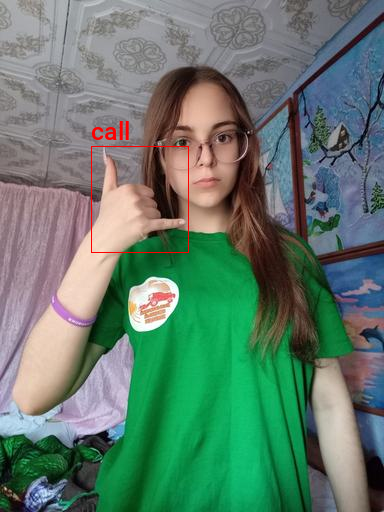

In [24]:
# Get the width and height of the image
width, height = img.size

# Create a copy of the image
annotated_img = img.copy()

# Create an ImageDraw object for drawing on the image
draw = ImageDraw.Draw(annotated_img)

# Set the font size
fnt_size = 25

# Get the row from the 'annotation_df' DataFrame corresponding to the 'file_id'
annotation = annotation_df.loc[file_id]

# Loop through the bounding boxes and labels in the 'annotation' DataFrame
for i in range(len(annotation['labels'])):
    # Get the bounding box coordinates
    x, y, w, h = annotation['bboxes'][i]
    
    # Scale the coordinates to the size of the image
    x *= width
    y *= height
    w *= width
    h *= height
    
    # Create a tuple of coordinates for the bounding box
    shape = (x, y, x+w, y+h)
    
    # Draw the bounding box on the image
    draw.rectangle(shape, outline='red')
    
    # Load the font file
    fnt = PIL.ImageFont.truetype(font_file, fnt_size)
    
    # Draw the label on the image
    draw.multiline_text((x, y-fnt_size-5), f"{annotation['labels'][i]}", font=fnt, fill='red')

# Print the dimensions of the image
print(annotated_img.size) 

# Show the image
annotated_img

**Create a class map**

In [25]:
# Get a list of unique labels in the 'annotation_df' DataFrame
labels = annotation_df['labels'].explode().unique().tolist()

# Display labels using a Pandas DataFrame
pd.DataFrame(labels)

0
0              call
1        no_gesture
2           dislike
3              fist
4              four
5              like
6              mute
7                ok
8               one
9              palm
10            peace
11   peace_inverted
12             rock
13             stop
14    stop_inverted
15            three
16           three2
17           two_up
18  two_up_inverted

In [26]:
# Create a ClassMap object using the list of labels
class_map = ClassMap(labels)

# Print the ClassMap object
class_map

<ClassMap: {'background': 0, 'call': 1, 'no_gesture': 2, 'dislike': 3, 'fist': 4, 'four': 5, 'like': 6, 'mute': 7, 'ok': 8, 'one': 9, 'palm': 10, 'peace': 11, 'peace_inverted': 12, 'rock': 13, 'stop': 14, 'stop_inverted': 15, 'three': 16, 'three2': 17, 'two_up': 18, 'two_up_inverted': 19}>

**Note:** The `background` class is not included in the final model.

**View template for an object detection record**

In [27]:
# Create an ObjectDetectionRecord object
template_record = ObjectDetectionRecord()

# Print the ObjectDetectionRecord object
template_record

BaseRecord

common: 
	- Filepath: None
	- Img: None
	- Image size None
	- Record ID: None
detection: 
	- Class Map: None
	- Labels: []
	- BBoxes: []

**View template for an object detection parser**

In [28]:
# Generate a template record for an object detection dataset using the ObjectDetectionRecord object
Parser.generate_template(template_record)

class MyParser(Parser):
    def __init__(self, template_record):
        super().__init__(template_record=template_record)
    def __iter__(self) -> Any:
    def __len__(self) -> int:
    def record_id(self, o: Any) -> Hashable:
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        record.set_filepath(<Union[str, Path]>)
        record.set_img_size(<ImgSize>)
        record.detection.set_class_map(<ClassMap>)
        record.detection.add_labels(<Sequence[Hashable]>)
        record.detection.add_bboxes(<Sequence[BBox]>)


**Define custom parser class**

In [29]:
# Define a subclass of the 'Parser' class
class HagridParser(Parser):
    # Define the constructor
    def __init__(self, template_record, annotations_df, img_dict, class_map):
        # Call the parent class constructor
        super().__init__(template_record=template_record)
        
        # Store the 'img_dict' and 'annotations_df' objects as instance variables
        self.img_dict = img_dict
        self.df = annotations_df
        
        # Store the 'class_map' object as an instance variable
        self.class_map = class_map
        
    # Define the '__iter__' method
    def __iter__(self) -> Any:
        # Yield the rows of the 'annotations_df' DataFrame
        for o in self.df.itertuples(): yield o
        
    # Define the '__len__' method
    def __len__(self) -> int: 
        # Return the number of rows in the 'annotations_df' DataFrame
        return len(self.df)
    
    # Define the 'record_id' method
    def record_id(self, o: Any) -> Hashable:
        # Return the index of the row
        return o.Index
    
    # Define the 'parse_fields' method
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        # Get the file path for the corresponding image
        filepath = self.img_dict[o.Index]
        print(filepath)
        
        # Open the image and get its width and height
        width, height = PIL.Image.open(filepath).convert('RGB').size
        
         # Set the size of the image in the 'record' object
        record.set_img_size(ImgSize(width=width, height=height))

        # Set the file path of the image in the 'record' object
        record.set_filepath(filepath)

        # Set the 'class_map' in the 'record' object
        record.detection.set_class_map(self.class_map)

        # Add the labels to the 'record' object
        record.detection.add_labels(o.labels)

        # Create an empty list for the bounding boxes
        bbox_list = []

        # Loop through the labels
        for i, label in enumerate(o.labels):
            # Get the bounding box coordinates
            x = o.bboxes[i][0]*width
            y = o.bboxes[i][1]*height
            w = o.bboxes[i][2]*width
            h = o.bboxes[i][3]*height
            # Create a BBox object and add it to the 'bbox_list'
            bbox_list.append(BBox.from_xywh(x, y, w, h))
        # Add the bounding boxes to the 'record' object
        record.detection.add_bboxes(bbox_list)

**Create a custom parser object**

In [30]:
# Create a HagridParser object
parser = HagridParser(template_record, annotation_df, img_dict, class_map)

# Get the number of rows in the 'annotation_df' DataFrame
num_rows = len(parser)

# Print the number of rows
print(num_rows)

31833


**Parse annotations to create records**

In [31]:
# Create a 'RandomSplitter' object
data_splitter = RandomSplitter([0.8, 0.2])

# Use the 'parse' method to split the data into training and validation sets
train_records, valid_records = parser.parse(data_splitter, cache_filepath=f'{dataset_name}-cache.pkl')

INFO     - Loading cached records from hagrid-sample-30k-384p-cache.pkl | icevision.parsers.parser:parse:113


**Inspect training records**

In [32]:
# Print the first element of the 'train_records' list
print(train_records[0])

BaseRecord

common: 
	- Image size ImgSize(width=384, height=512)
	- Filepath: /home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/05df3a26-3ec8-4aed-934b-c929e4abf5e7.jpg
	- Img: None
	- Record ID: 05df3a26-3ec8-4aed-934b-c929e4abf5e7
detection: 
	- Class Map: <ClassMap: {'background': 0, 'call': 1, 'no_gesture': 2, 'dislike': 3, 'fist': 4, 'four': 5, 'like': 6, 'mute': 7, 'ok': 8, 'one': 9, 'palm': 10, 'peace': 11, 'peace_inverted': 12, 'rock': 13, 'stop': 14, 'stop_inverted': 15, 'three': 16, 'three2': 17, 'two_up': 18, 'two_up_inverted': 19}>
	- Labels: [1]
	- BBoxes: [<BBox (xmin:118.77647232000001, ymin:183.18269952, xmax:191.83692288000003, ymax:251.16367872)>]


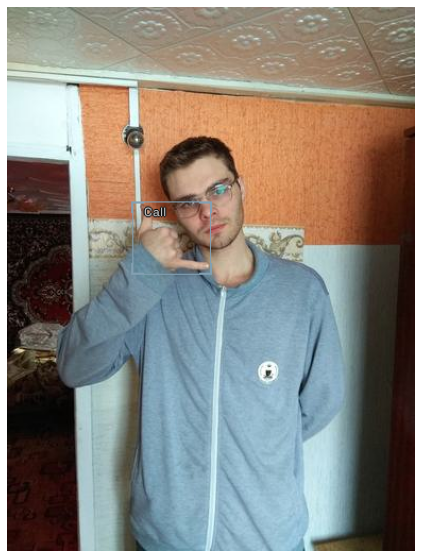

In [33]:
# Use the 'show_record' function to display the first element of the 'train_records' object with annotations
show_record(train_records[0], figsize = (10,10), display_label=True)

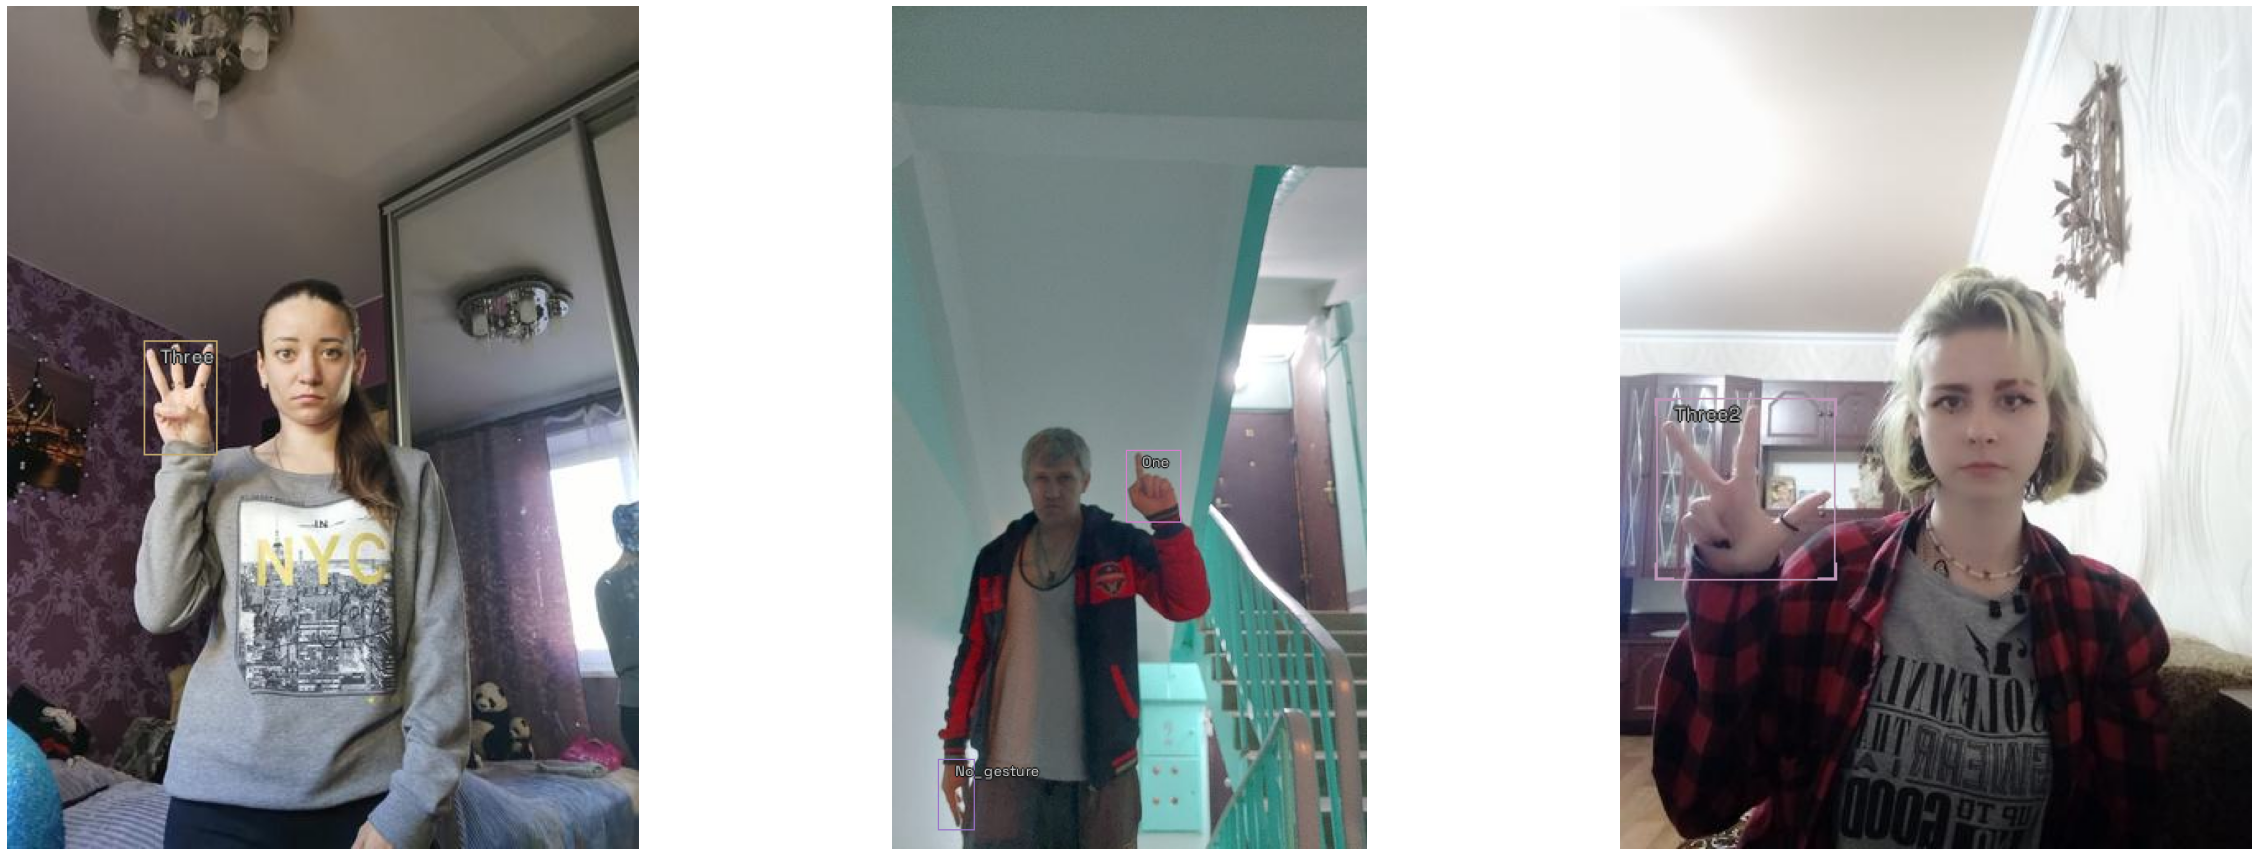

In [34]:
# Use the 'show_records' function to display the second, third, and fourth elements of the 'train_records' list  with annotations
show_records(train_records[1:4], ncols=3,display_label=True)

**Define stride values**

In [35]:
# Define a list of 'strides'
strides = [8, 16, 32]

# Get the maximum value in the 'strides' list
max_stride = max(strides)

**Select a multiple of the max stride value as the input resolution**

In [36]:
# Show a list of input resolutions by multiplying the maximum stride by numbers in the range 7-20
[max_stride*i for i in range(7,21)]

[224, 256, 288, 320, 352, 384, 416, 448, 480, 512, 544, 576, 608, 640]

**Define input resolution**

In [37]:
# Define the size of the image
image_size = 384

# Define the presize of the image
presize = 512

**Define Transforms**

In [38]:
# Show the default augmentations included with the 'aug_tfms' function using a Pandas DataFrame
pd.DataFrame(tfms.A.aug_tfms(size=image_size, presize=presize))

0
0                                                                                                                                                                                      SmallestMaxSize(always_apply=False, p=1, max_size=512, interpolation=1)
1                                                                                                                                                                                                                    HorizontalFlip(always_apply=False, p=0.5)
2  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit_x=(-0.0625, 0.0625), shift_limit_y=(-0.0625, 0.0625), scale_limit=(-0.09999999999999998, 0.10000000000000009), rotate_limit=(-15, 15), interpolation=1, border_mode=4, value=None, mask_value=None)
3                                                                                                                                               RGBShift(always_apply=False, p=0.5, r_shift_limit=(-10, 10), g_shift_limit=(-10, 10), b_shift_limit=(-10, 10))
4                                                                                                                        RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True)
5                                                                                                                                                                                                           Blur(always_apply=False, p=0.5, blur_limit=(1, 3))
6                                          OneOrOther([\n  RandomSizedBBoxSafeCrop(always_apply=False, p=0.5, height=384, width=384, erosion_rate=0.0, interpolation=1),\n  LongestMaxSize(always_apply=False, p=1, max_size=384, interpolation=1),\n], p=0.5)
7                                                                                PadIfNeeded(always_apply=False, p=1.0, min_height=384, min_width=384, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=[124, 116, 104], mask_value=None)

In [39]:
# Show the transforms included with the 'resize_and_pad' function using a Pandas DataFrame
pd.DataFrame(tfms.A.resize_and_pad(size=image_size))

0
0                                                                                                         LongestMaxSize(always_apply=False, p=1, max_size=384, interpolation=1)
1  PadIfNeeded(always_apply=False, p=1.0, min_height=384, min_width=384, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=[124, 116, 104], mask_value=None)

In [40]:
# Define the 'train_tfms' adapter using the 'Adapter' method and the 'aug_tfms' function
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=presize), tfms.A.Normalize()])

# Define the 'valid_tfms' adapter using the 'Adapter' method and the 'resize_and_pad' function
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

**Get normalization stats**

In [41]:
# Get the mean of the Normalize() transformation
mean = tfms.A.Normalize().mean

# Get the standard deviation of the Normalize() transformation
std = tfms.A.Normalize().std

# Print the mean and standard deviation
mean, std

((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

**Define Datasets**

In [42]:
# Create a Dataset object using the 'train_records' and 'train_tfms' variables
train_ds = Dataset(train_records, train_tfms)

# Create a Dataset object using the 'valid_records' and 'valid_tfms' variables
valid_ds = Dataset(valid_records, valid_tfms)

# Print the 'train_ds' and 'valid_ds' objects
train_ds, valid_ds

(<Dataset with 25466 items>, <Dataset with 6367 items>)

**Apply augmentations to a training sample**

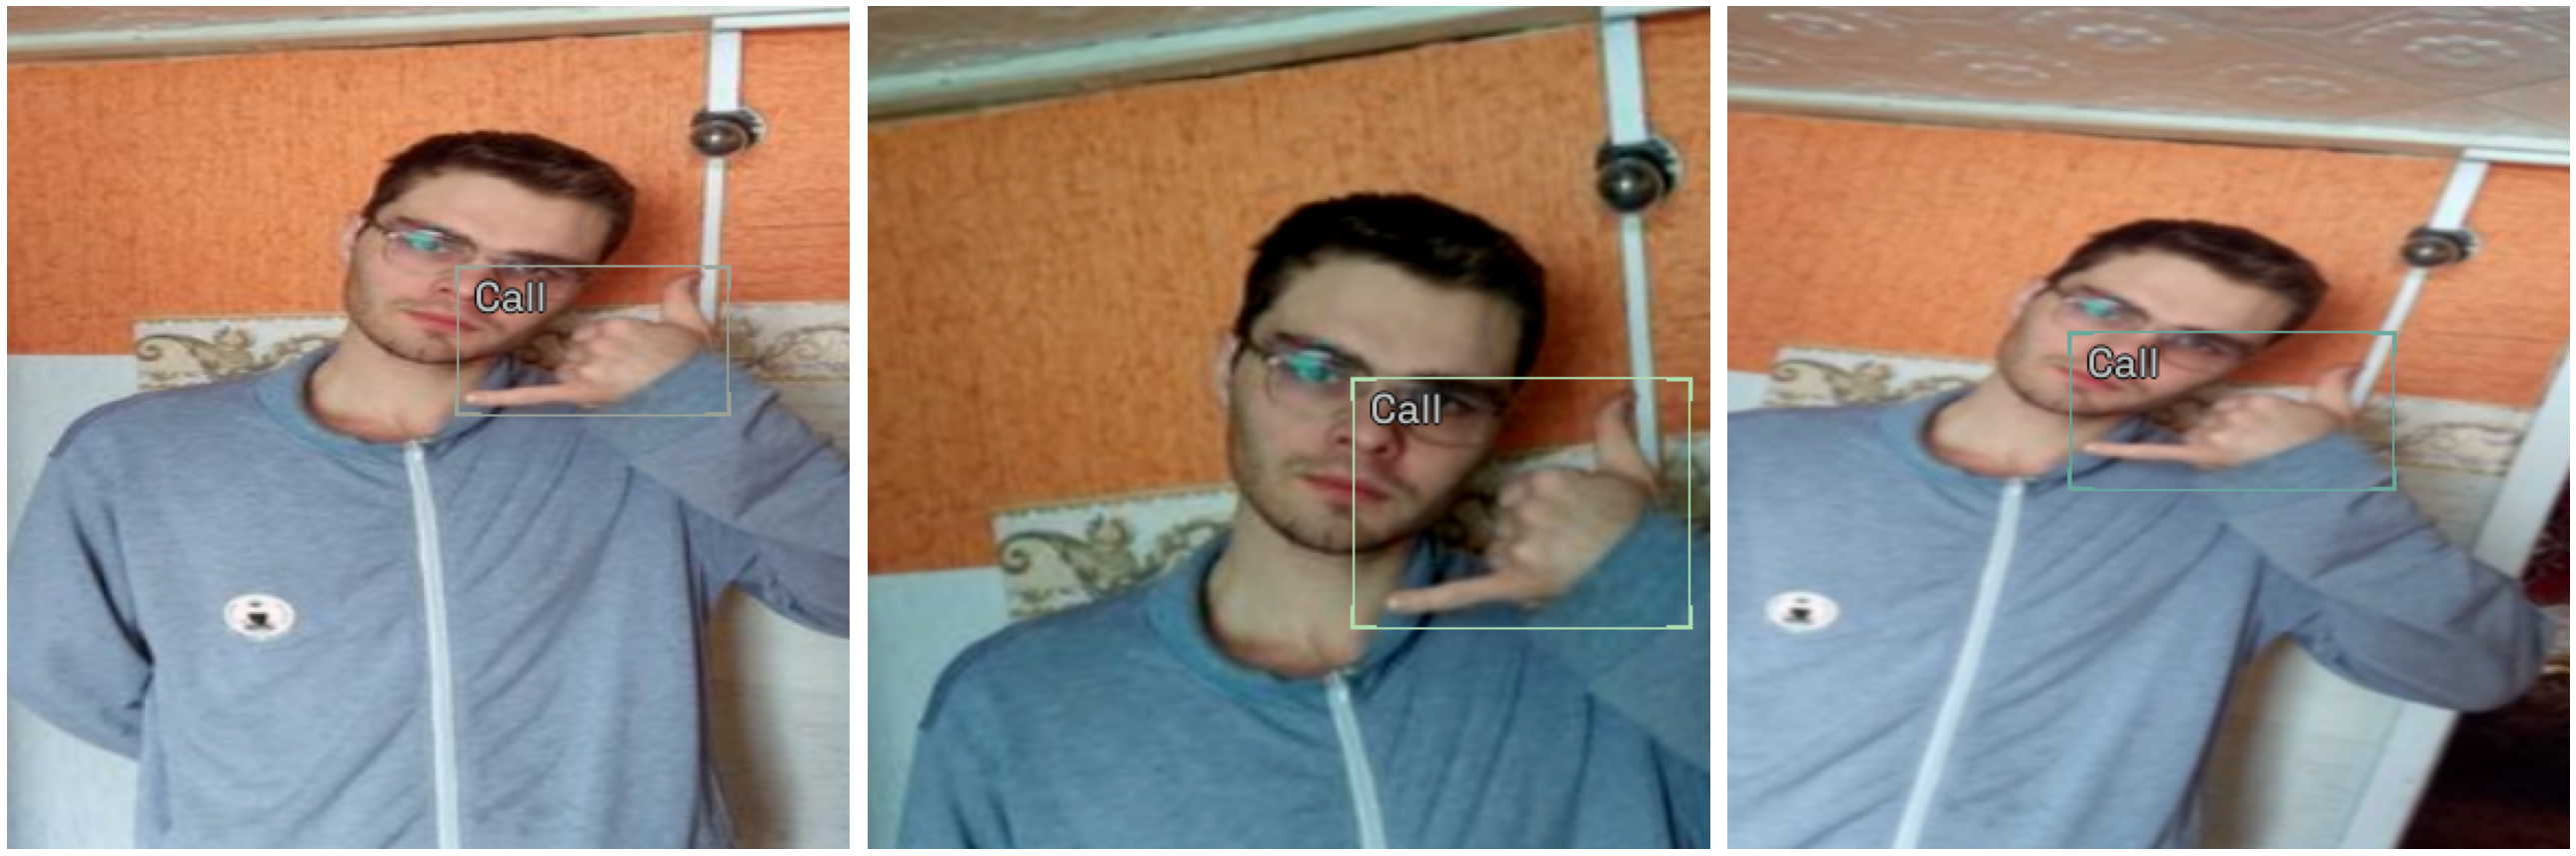

In [43]:
# Create a list of three samples from the 'train_ds' dataset object
samples = [train_ds[0] for _ in range(3)]

# Show the samples using the 'show_samples' function
show_samples(samples, ncols=3)

**Define model type**

In [44]:
# Set the model type to YOLOX
model_type = models.mmdet.yolox

**Define backbone**

In [45]:
# Create a YOLOX Tiny backbone for the model
backbone = model_type.backbones.yolox_tiny_8x8(pretrained=True)

# Show the backbone information using a Pandas Dataframe
pd.DataFrame.from_dict(backbone.__dict__, orient='index')

0
model_name                                                                                                                                  yolox
config_path                    /home/innom-dt/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs/yolox/yolox_tiny_8x8_300e_coco.py
weights_url  https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20210806_234250-4ff3b67e.pth
pretrained                                                                                                                                   True

**Define batch size**

In [46]:
# Set the batch size
bs = 32

**Define DataLoaders**

In [47]:
# Create a DataLoader for the training set
train_dl = model_type.train_dl(train_ds, batch_size=bs, num_workers=2, shuffle=True)

# Create a DataLoader for the validation set
valid_dl = model_type.valid_dl(valid_ds, batch_size=bs, num_workers=2, shuffle=False)

**Instantiate the model**

In [48]:
# Create a YOLOX Tiny model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=parser.class_map.num_classes) 

2022-12-09 18:09:09,012 - mmcv - INFO - initialize CSPDarknet with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-12-09 18:09:09,026 - mmcv - INFO - initialize YOLOXPAFPN with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-12-09 18:09:09,037 - mmcv - INFO - initialize YOLOXHead with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-12-09 18:09:09,043 - mmcv - INFO - 
backbone.stem.conv.conv.weight - torch.Size([24, 12, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,044 - mmcv - INFO - 
backbone.stem.conv.bn.weight - torch.Size([24]): 
The value is the same before and after calling `init_weights` of

2022-12-09 18:09:09,055 - mmcv - INFO - 
backbone.stage2.1.blocks.1.conv1.bn.bias - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,055 - mmcv - INFO - 
backbone.stage2.1.blocks.1.conv2.conv.weight - torch.Size([48, 48, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,055 - mmcv - INFO - 
backbone.stage2.1.blocks.1.conv2.bn.weight - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,055 - mmcv - INFO - 
backbone.stage2.1.blocks.1.conv2.bn.bias - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,056 - mmcv - INFO - 
backbone.stage2.1.blocks.2.conv1.conv.weight - torch.Size([48, 48, 1, 1]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,05

2022-12-09 18:09:09,068 - mmcv - INFO - 
backbone.stage4.1.conv1.bn.weight - torch.Size([192]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,069 - mmcv - INFO - 
backbone.stage4.1.conv1.bn.bias - torch.Size([192]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,069 - mmcv - INFO - 
backbone.stage4.1.conv2.conv.weight - torch.Size([384, 768, 1, 1]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,069 - mmcv - INFO - 
backbone.stage4.1.conv2.bn.weight - torch.Size([384]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,069 - mmcv - INFO - 
backbone.stage4.1.conv2.bn.bias - torch.Size([384]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,069 - mmcv - INFO - 
backbone.stage4.2.main_conv.conv.weight - torch.Size([192, 38

2022-12-09 18:09:09,080 - mmcv - INFO - 
neck.top_down_blocks.1.main_conv.bn.bias - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,081 - mmcv - INFO - 
neck.top_down_blocks.1.short_conv.conv.weight - torch.Size([48, 192, 1, 1]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,081 - mmcv - INFO - 
neck.top_down_blocks.1.short_conv.bn.weight - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,081 - mmcv - INFO - 
neck.top_down_blocks.1.short_conv.bn.bias - torch.Size([48]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,081 - mmcv - INFO - 
neck.top_down_blocks.1.final_conv.conv.weight - torch.Size([96, 96, 1, 1]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:

2022-12-09 18:09:09,091 - mmcv - INFO - 
neck.bottom_up_blocks.1.blocks.0.conv1.conv.weight - torch.Size([192, 192, 1, 1]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,091 - mmcv - INFO - 
neck.bottom_up_blocks.1.blocks.0.conv1.bn.weight - torch.Size([192]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,091 - mmcv - INFO - 
neck.bottom_up_blocks.1.blocks.0.conv1.bn.bias - torch.Size([192]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,091 - mmcv - INFO - 
neck.bottom_up_blocks.1.blocks.0.conv2.conv.weight - torch.Size([192, 192, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,092 - mmcv - INFO - 
neck.bottom_up_blocks.1.blocks.0.conv2.bn.weight - torch.Size([192]): 
The value is the same before and after calling `init_weigh

2022-12-09 18:09:09,100 - mmcv - INFO - 
bbox_head.multi_level_reg_convs.1.1.bn.weight - torch.Size([96]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,100 - mmcv - INFO - 
bbox_head.multi_level_reg_convs.1.1.bn.bias - torch.Size([96]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,101 - mmcv - INFO - 
bbox_head.multi_level_reg_convs.2.0.conv.weight - torch.Size([96, 96, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-12-09 18:09:09,102 - mmcv - INFO - 
bbox_head.multi_level_reg_convs.2.0.bn.weight - torch.Size([96]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,103 - mmcv - INFO - 
bbox_head.multi_level_reg_convs.2.0.bn.bias - torch.Size([96]): 
The value is the same before and after calling `init_weights` of YOLOX  
 
2022-12-09 18:09:09,104 - mmcv - INFO - 
bbox_he

Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 96, 1, 1]) from checkpoint, the shape in current model is torch.Size([19, 96, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([19]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 96, 1, 1]) from checkpoint, the shape in current model is torch.Size([19, 96, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([19]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 96, 1, 1]) from checkpoint, the shape in current model is torch.Size([19, 96, 1, 1]).
size mismatch for bbox_

**Define metrics**

In [49]:
# Define a list of metrics to evaluate the model
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

**Define Learner object**

In [50]:
# Create a fastai learner object to train and evaluate the YOLOX Tiny model
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

**Find learning rate**

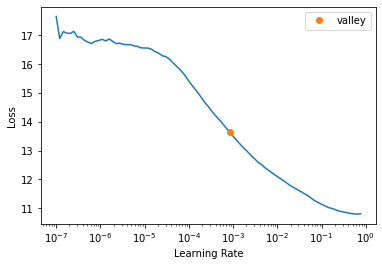

In [51]:
# Use the learning rate finder to find a good learning rate for the YOLOX Tiny model
suggested_lrs = learn.lr_find()

**Define learning rate**

In [52]:
# Use the suggested learning rate identified by the learning rate finder
lr = suggested_lrs.valley
lr

0.0008317637839354575

**Define number of epochs**

In [53]:
# Set the number of epochs to train the YOLOX Tiny model
epochs = 20

**Finetune model**

In [54]:
# Train the YOLOX Tiny model
learn.fine_tune(epochs, lr, freeze_epochs=1)

**Define method to convert a PIL Image to a Pytorch Tensor**

In [70]:
def img_to_tensor(img:PIL.Image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    Converts a PIL image to a PyTorch tensor.
    
    Args:
        img: The input PIL image.
        mean: The mean values for normalization.
        std: The standard deviation values for normalization.
    
    Returns:
        The normalized tensor.
    """
    # Convert image to tensor
    img_tensor = torch.Tensor(np.array(img)).permute(2, 0, 1)
    # Scale pixels values from [0,255] to [0,1]
    scaled_tensor = img_tensor.float().div_(255)
    # Prepare normalization tensors
    mean_tensor = tensor(mean).view(1,1,-1).permute(2, 0, 1)
    std_tensor = tensor(std).view(1,1,-1).permute(2, 0, 1)
    # Normalize tensor    
    normalized_tensor = (scaled_tensor - mean_tensor) / std_tensor
    # Batch tensor
    return normalized_tensor.unsqueeze(dim=0)

**Select a test image**

In [56]:
annotation_df.iloc[4].to_frame()

00973fac-440e-4a56-b60c-2a06d5fb155d
bboxes        [[0.40980118, 0.38144198, 0.08338464, 0.06229785], [0.6122035100000001, 0.6780825500000001, 0.04700606, 0.07640522]]
labels                                                                                                          [call, no_gesture]
leading_hand                                                                                                                 right
leading_conf                                                                                                                     1
user_id                                                           4bb3ee1748be58e05bd1193939735e57bb3c0ca59a7ee38901744d6b9e94632e

**Get the test image file path**


In [65]:
# Retrieve the image file path associated with the fifth entry in the 'annotation_df' DataFrame object
test_file = img_dict[annotation_df.iloc[4].name]

# Print the test file path
test_file

Path('/home/innom-dt/.fastai/archive/../data/hagrid-sample-30k-384p/hagrid_30k/train_val_call/00973fac-440e-4a56-b60c-2a06d5fb155d.jpg')

**Load the test image**

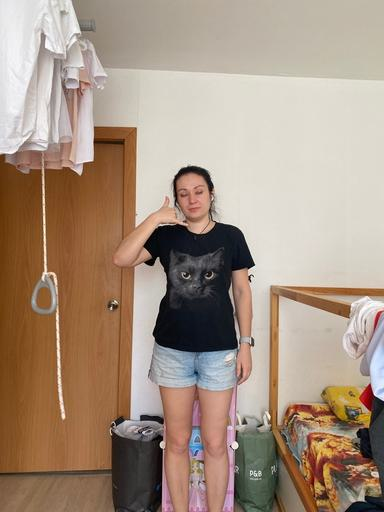

In [66]:
# Open the 10th file in the files list
test_img = PIL.Image.open(test_file).convert('RGB')

# Display the test image
test_img

**Calculate valid input dimensions**

In [67]:
# Calculate the input height and width for the test image
input_h = test_img.height - (test_img.height % max_stride)
input_w = test_img.width - (test_img.width % max_stride)

# Print the input height and width
input_h, input_w

(512, 384)

**Crop image to supported resolution**

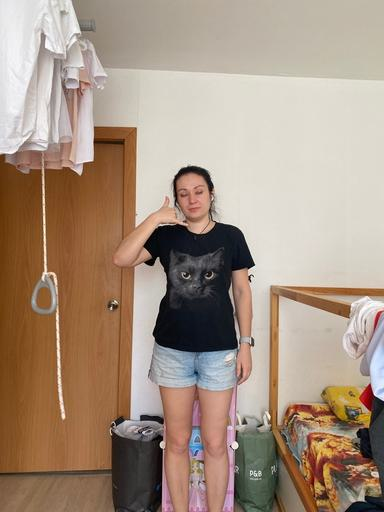

In [68]:
# Crop and pad the test image to match the input height and width
test_img = test_img.crop_pad((input_w, input_h))

# Print the resulting test image
test_img

**Convert image to a normalized tensor**

In [71]:
# Convert the test image to a tensor
test_tensor = img_to_tensor(test_img, mean=mean, std=std)

# Print the shape of the resulting tensor
print(test_tensor.shape)

torch.Size([1, 3, 512, 384])


**Inspect raw model output**

In [72]:
# Get the raw model output using the test tensor
model_output = model.cpu().forward_dummy(test_tensor.cpu())

In [73]:
# Print the shape for each tensor in the model output
for raw_out in model_output:
    for out in raw_out:
        print(out.shape)

torch.Size([1, 19, 64, 48])
torch.Size([1, 19, 32, 24])
torch.Size([1, 19, 16, 12])
torch.Size([1, 4, 64, 48])
torch.Size([1, 4, 32, 24])
torch.Size([1, 4, 16, 12])
torch.Size([1, 1, 64, 48])
torch.Size([1, 1, 32, 24])
torch.Size([1, 1, 16, 12])


**Define custom forward function for exporting the model**

In [64]:
def forward_export(self, input_tensor):
    
    # Get raw model output
    model_output = self.forward_dummy(input_tensor.cpu())
    
    # Get the classification scores from the model output
    cls_scores = model_output[0]
    
    # Get the bounding box predictions from the model output
    bbox_preds = model_output[1]
    
    # Get the objectness scores from the model output
    objectness = model_output[2]
    
    # Process the stride 8 output
    stride_8_cls = torch.sigmoid(cls_scores[0])
    stride_8_bbox = bbox_preds[0]
    stride_8_objectness = torch.sigmoid(objectness[0])
    stride_8_cat = torch.cat((stride_8_bbox, stride_8_objectness, stride_8_cls), dim=1)
    stride_8_flat = torch.flatten(stride_8_cat, start_dim=2)

    # Process the stride 16 output
    stride_16_cls = torch.sigmoid(cls_scores[1])
    stride_16_bbox = bbox_preds[1]
    stride_16_objectness = torch.sigmoid(objectness[1])
    stride_16_cat = torch.cat((stride_16_bbox, stride_16_objectness, stride_16_cls), dim=1)
    stride_16_flat = torch.flatten(stride_16_cat, start_dim=2)

    # Process the stride 32 output
    stride_32_cls = torch.sigmoid(cls_scores[2])
    stride_32_bbox = bbox_preds[2]
    stride_32_objectness = torch.sigmoid(objectness[2])
    stride_32_cat = torch.cat((stride_32_bbox, stride_32_objectness, stride_32_cls), dim=1)
    stride_32_flat = torch.flatten(stride_32_cat, start_dim=2)

    # Concatenate all of the processed outputs
    full_cat = torch.cat((stride_8_flat, stride_16_flat, stride_32_flat), dim=2)

    # Return the concatenated outputs in a permuted form
    return full_cat.permute(0, 2, 1)

**Add custom forward function to model**

In [65]:
# Bind the forward_export method to the model object
model.forward_export = forward_export.__get__(model)

**Verify output shape**

In [66]:
# Call the forward_export method on the model object, passing in the test_tensor as an argument
# and get the shape of the output tensor
model.forward_export(test_tensor).shape

torch.Size([1, 4032, 24])

**Create a backup of the default model forward function**

In [67]:
# Save the original forward method of the model
origin_forward = model.forward

**Replace model forward function with custom function**

In [68]:
# Replace the original forward method of the model with the forward_export method
model.forward = model.forward_export

**Verify output shape**

In [69]:
# Call the forward_export method on the model object, passing in the test_tensor as an argument
# and get the shape of the output tensor
model(test_tensor).shape

torch.Size([1, 4032, 24])

**Define ONNX file name**

In [51]:
# Create a filename for the ONNX model
onnx_file_name = f"{dataset_name}-{type(model).__name__}.onnx"

# Display the filename
onnx_file_name

'hagrid-sample-30k-384p-YOLOX.onnx'

**Export trained model to ONNX**

In [71]:
# Export the PyTorch model to ONNX format
torch.onnx.export(model,
                  test_tensor,
                  onnx_file_name,
                  export_params=True,
                  opset_version=11,
                  do_constant_folding=True,
                  input_names = ['input'],
                  output_names = ['output'],
                  dynamic_axes={'input': {2 : 'height', 3 : 'width'}}
                 )

**Simplify ONNX model**

In [52]:
# Import the onnx module
import onnx

# Import the simplify method from the onnxsim module
from onnxsim import simplify

In [53]:
# Load the ONNX model from the onnx_file_name
onnx_model = onnx.load(onnx_file_name)

# Simplify the model
model_simp, check = simplify(onnx_model)

# Save the simplified model to the onnx_file_name
onnx.save(model_simp, onnx_file_name)

**Import OpenVINO Dependencies**

In [54]:
# Import the Core class from the openvino.runtime module
from openvino.runtime import Core

In [55]:
# Import the Markdown and display classes from the IPython.display module
from IPython.display import Markdown, display

**Define export directory**

In [56]:
# Create a Path object representing the current directory
output_dir = Path('./')

# Print the output_dir object
output_dir

Path('.')

**Define path for OpenVINO IR xml model file**

In [58]:
# Create a Path object representing the IR xml file using the ONNX model file name without the file extension
ir_path = Path(f"{onnx_file_name.split('.')[0]}.xml")

# Print the ir_path object
ir_path

Path('hagrid-sample-30k-384p-YOLOX.xml')

**Define arguments for model conversion script**

In [60]:
# Create the Model Optimizer command to convert the ONNX model to OpenVINO
mo_command = f"""mo
                 --input_model "{onnx_file_name}"
                 --input_shape "[1,3, {image_size}, {image_size}]"
                 --mean_values="{mean}"
                 --scale_values="{std}"
                 --data_type FP16
                 --output_dir "{output_dir}"
                 """

# Remove extra whitespace from the command string
mo_command = " ".join(mo_command.split())

# Print the command and format it as a Bash code block
print("Model Optimizer command to convert the ONNX model to OpenVINO:")
display(Markdown(f"```bash\n{mo_command}\n```"))

Model Optimizer command to convert the ONNX model to OpenVINO:


```bash
mo --input_model "hagrid-sample-30k-384p-YOLOX.onnx" --input_shape "[1,3, 384, 384]" --mean_values="(0.485, 0.456, 0.406)" --scale_values="(0.229, 0.224, 0.225)" --data_type FP16 --output_dir "."
```

**Convert ONNX model to OpenVINO IR**

In [61]:
# Check if the IR model file exists
if not ir_path.exists():
    # If the IR model file does not exist, export the ONNX model to IR
    print("Exporting ONNX model to IR... This may take a few minutes.")
    mo_result = %sx $mo_command
    print("\n".join(mo_result))
else:
    # If the IR model file already exists, print a message
    print(f"IR model {ir_path} already exists.")

Exporting ONNX model to IR... This may take a few minutes.
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/media/innom-dt/Samsung_T3/Projects/GitHub/icevision-openvino-unity-tutorial/notebooks/hagrid-sample-30k-384p-YOLOX.onnx
	- Path for generated IR: 	/media/innom-dt/Samsung_T3/Projects/GitHub/icevision-openvino-unity-tutorial/notebooks/.
	- IR output name: 	hagrid-sample-30k-384p-YOLOX
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,3, 384, 384]
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	(0.485, 0.456, 0.406)
	- Scale values: 	(0.229, 0.224, 0.225)
	- Scale factor: 	Not specified
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fi

**Get available OpenVINO compute devices**

In [62]:
# Create an instance of the Core class
ie = Core()

# Get the list of available devices
devices = ie.available_devices

# Iterate over the available devices
for device in devices:
    # Get the device name
    device_name = ie.get_property(device_name=device, name="FULL_DEVICE_NAME")
    
    # Print the device and its name
    print(f"{device}: {device_name}")

CPU: 11th Gen Intel(R) Core(TM) i7-11700K @ 3.60GHz


**Prepare input image for OpenVINO IR model**

In [74]:
# Convert the test image to a Tensor
img_tensor = torch.Tensor(np.array(test_img)).permute(2, 0, 1)

# Scale the values of the Tensor from [0,255] to [0,1]
scaled_tensor = img_tensor.float().div_(255)

In [75]:
# Add an extra dimension to the Tensor
input_image = scaled_tensor.unsqueeze(dim=0)

# Print the shape of the input image
input_image.shape

torch.Size([1, 3, 512, 384])

**Test OpenVINO IR model**

In [76]:
# Create an instance of the Core class
ie = Core()

# Read the IR model file
model_ir = ie.read_model(model=ir_path)

# Reshape the model to match the shape of the input image
model_ir.reshape(input_image.shape)

# Compile the model for the CPU device
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get the input and output layers of the compiled model
input_layer_ir = next(iter(compiled_model_ir.inputs))
output_layer_ir = next(iter(compiled_model_ir.outputs))

# Run the model on the input image and get the output
res_ir = compiled_model_ir([input_image])[output_layer_ir]

In [77]:
# Print the shape of the model output
res_ir.shape

(1, 4032, 24)

**Define method to generate stride values to navigate the raw model output**

In [78]:
def generate_grid_strides(height, width, strides=[8, 16, 32]):
    """
    Generate a list of dictionaries containing grid coordinates and strides for a given height and width.
    
    Args:
        height (int): The height of the image.
        width (int): The width of the image.
        strides (list): A list of strides to use for generating grid coordinates.
        
    Returns:
        list: A list of dictionaries containing grid coordinates and strides.
    """
    
    # Create an empty list to store the grid coordinates and strides
    grid_strides = []

    # Iterate over the strides
    for stride in strides:
        # Calculate the grid height and width
        grid_height = height // stride
        grid_width = width // stride

        # Iterate over the grid coordinates
        for g1 in range(grid_height):
            for g0 in range(grid_width):
                # Append a dictionary containing the grid coordinates and stride to the list
                grid_strides.append({'grid0':g0, 'grid1':g1, 'stride':stride })
    
    # Return the list of dictionaries
    return grid_strides

**Generate stride values to navigate model output**

In [79]:
# Generate the grid coordinates and strides
grid_strides = generate_grid_strides(test_img.height, test_img.width, strides)

# Print the length of the list of grid coordinates and strides
len(grid_strides)

4032

In [80]:
# Print the first few rows of the list using a DataFrame
pd.DataFrame(grid_strides).head()

grid0  grid1  stride
0      0      0       8
1      1      0       8
2      2      0       8
3      3      0       8
4      4      0       8

**Define method to generate object detection proposals from the raw model output**

In [81]:
def generate_yolox_proposals(model_output, proposal_length, grid_strides, bbox_conf_thresh=0.3):
    """
    Generate a list of bounding box proposals from the model output.
    
    Args:
        model_output (numpy array): The output of the YOLOv3 model.
        proposal_length (int): The length of each proposal in the model output.
        grid_strides (list): A list of dictionaries containing grid coordinates and strides.
        bbox_conf_thresh (float): The confidence threshold for bounding box proposals.
        
    Returns:
        list: A list of bounding box proposals.
    """
    
    # Create an empty list to store the bounding box proposals
    proposals = []
    
    # Calculate the number of classes
    num_classes = proposal_length - 5

    # Iterate over the grid coordinates and strides
    for anchor_idx in range(len(grid_strides)):
        
        # Get the grid coordinates and stride for the current anchor
        grid0 = grid_strides[anchor_idx]['grid0']
        grid1 = grid_strides[anchor_idx]['grid1']
        stride = grid_strides[anchor_idx]['stride']

        # Calculate the starting index for the current anchor in the model output
        start_idx = anchor_idx * proposal_length

        # Calculate the bounding box coordinates
        x_center = (model_output[start_idx + 0] + grid0) * stride
        y_center = (model_output[start_idx + 1] + grid1) * stride
        w = np.exp(model_output[start_idx + 2]) * stride
        h = np.exp(model_output[start_idx + 3]) * stride
        x0 = x_center - w * 0.5
        y0 = y_center - h * 0.5

        # Get the objectness score for the current anchor
        box_objectness = model_output[start_idx + 4]
        
        # Create an empty dictionary to store the bounding box proposal
        obj = { 'x0':x0, 'y0':y0, 'width':w, 'height':h, 'label':0, 'prob':0 }

        # Iterate over the classes
        for class_idx in range(num_classes):

            # Calculate the probability of the current class
            box_cls_score = model_output[start_idx + 5 + class_idx]
            box_prob = box_objectness * box_cls_score

            # If the probability is greater than the current maximum, update the proposal dictionary
            if (box_prob > obj['prob']):
                obj['label'] = class_idx
                obj['prob'] = box_prob

        # If the bounding box proposal has a probability greater than the specified threshold, add it to the list of proposals
        if obj['prob'] > bbox_conf_thresh: proposals.append(obj)
        
    # Sort the list of bounding box proposals by probability in descending order
    proposals.sort(key=lambda x:x['prob'], reverse=True)
    return proposals

**Define minimum confidence score for keeping bounding box proposals**

In [82]:
# Set the bounding box confidence threshold
bbox_conf_thresh = 0.5

**Process raw model output**

In [83]:
# Generate proposals from the model output
proposals = generate_yolox_proposals(res_ir.flatten(), res_ir.shape[2], grid_strides, bbox_conf_thresh)

# Convert the proposals to a Pandas DataFrame
proposals_df = pd.DataFrame(proposals)

# Add the label names to the DataFrame
proposals_df['label'] = proposals_df['label'].apply(lambda x: labels[x])

# Print the proposals Dataframe
proposals_df

x0          y0      width     height       label      prob
0   234.084399  345.059397  19.638884  40.022980  no_gesture  0.887864
1   234.122849  344.858476  19.512623  40.319473  no_gesture  0.887479
2   233.998906  344.849410  19.742203  39.664391  no_gesture  0.879032
3   154.565092  193.542165  35.063389  34.609722        call  0.876051
4   154.257556  193.482616  35.451900  34.860138        call  0.867827
5   154.484365  193.435712  34.926231  35.332264        call  0.866654
6   234.141719  344.954988  19.724554  40.226116  no_gesture  0.865423
7   233.691895  344.861304  20.142962  40.653099  no_gesture  0.857602
8   154.580361  193.261580  34.681351  35.288120        call  0.847856
9   233.792754  344.441489  20.184782  40.635910  no_gesture  0.829289
10  154.467418  193.468482  35.273167  34.796146        call  0.829163
11  154.234487  193.324329  35.518040  34.588329        call  0.816633
12  155.282080  193.360302  34.524830  35.269939        call  0.804335
13  233.925717  344.809189  19.701090  40.598907  no_gesture  0.779452
14  233.717521  344.739007  20.083487  40.492405  no_gesture  0.736652
15  154.407403  193.529026  34.728149  33.798748        call  0.687202

**Define function to calculate the union area of two bounding boxes**

In [84]:
def calc_union_area(a, b):
    # Find the minimum x-coordinate of the two rectangles
    x = min(a['x0'], b['x0'])
    
    # Find the minimum y-coordinate of the two rectangles
    y = min(a['y0'], b['y0'])
    
    # Find the maximum x-coordinate of the two rectangles
    w = max(a['x0']+a['width'], b['x0']+b['width']) - x
    
    # Find the maximum y-coordinate of the two rectangles
    h = max(a['y0']+a['height'], b['y0']+b['height']) - y
    
    # Return the area of the combined rectangle
    return w*h

**Define function to calculate the intersection area of two bounding boxes**

In [85]:
def calc_inter_area(a, b):
    # Find the maximum x-coordinate of the two rectangles
    x = max(a['x0'], b['x0'])
    
    # Find the maximum y-coordinate of the two rectangles
    y = max(a['y0'], b['y0'])
    
    # Find the minimum x-coordinate of the two rectangles
    w = min(a['x0']+a['width'], b['x0']+b['width']) - x
    
    # Find the minimum y-coordinate of the two rectangles
    h = min(a['y0']+a['height'], b['y0']+b['height']) - y
    
    # Return the area of the intersecting rectangle
    return w*h

**Define function to sort bounding box proposals using Non-Maximum Suppression**

In [86]:
def nms_sorted_boxes(nms_thresh=0.45):
    # Initialize a list to store the indices of the proposals to keep
    proposal_indices = []

    # Loop over all proposals in the input list
    for i in range(len(proposals)):
        # Get the ith proposal
        a = proposals[i]

        # Assume that we want to keep this proposal by default
        keep = True

        # Loop over the indices of the proposals that we want to keep
        for j in proposal_indices:
            # Get the jth proposal
            b = proposals[j]

            # Compute the area of the intersection of the ith and jth proposals
            inter_area = calc_inter_area(a, b)

            # Compute the area of the union of the ith and jth proposals
            union_area = calc_union_area(a, b)

            # If the intersection of the ith and jth proposals is more than the specified non-max suppression
            # threshold, we don't want to keep the ith proposal
            if inter_area / union_area > nms_thresh:
                keep = False

        # If we want to keep the ith proposal, append its index to the list of proposal indices
        if keep:
            proposal_indices.append(i)

    # Return the list of proposal indices
    return proposal_indices

**Define threshold for sorting bounding box proposals**

In [87]:
# Set the non-max suppression threshold
nms_thresh = 0.45

**Sort bouning box proposals using NMS**

In [88]:
# Apply non-max suppression to the list of proposals with the specified non-max suppression threshold
proposal_indices = nms_sorted_boxes(nms_thresh)

# Print the list of proposal indices
print(proposal_indices)

[0, 3]


**Filter excluded bounding box proposals**

In [89]:
# Print the rows from the proposals DataFrame that correspond to the indices
# returned by the non-max suppression algorithm
proposals_df.iloc[proposal_indices]

x0          y0      width     height       label      prob
0  234.084399  345.059397  19.638884  40.022980  no_gesture  0.887864
3  154.565092  193.542165  35.063389  34.609722        call  0.876051

**Import library for generating color palette**

In [90]:
# Import the distinctipy module
from distinctipy import distinctipy

**Generate a visually distinct color for each label**

In [91]:
# Use the distinctipy module to generate a list of colors with a length equal to the number of labels
colors = distinctipy.get_colors(len(labels))

**Display the generated color palette**

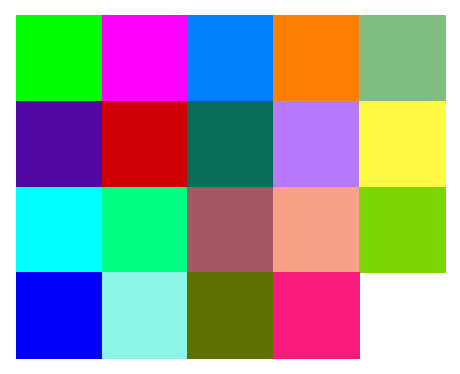

In [92]:
# Use the distinctipy module to generate a color swatch using the list of colors
distinctipy.color_swatch(colors)

**Set precision for color values**

In [94]:
# Set the precision to 5 decimal places
precision = 5

**Round color values to specified precision**

In [97]:
# Round the values in the list of colors to the specified precision
colors = [[np.round(ch, precision) for ch in color] for color in colors]

# Display the rounded list of colors using a Pandas Dataframe
pd.DataFrame(colors)

0        1        2
0   0.00000  1.00000  0.00000
1   1.00000  0.00000  1.00000
2   0.00000  0.50000  1.00000
3   1.00000  0.50000  0.00000
4   0.50000  0.75000  0.50000
5   0.32114  0.03531  0.64056
6   0.80830  0.00115  0.02081
7   0.02177  0.42475  0.33483
8   0.72261  0.47583  0.99531
9   0.99715  0.97599  0.25699
10  0.00000  1.00000  1.00000
11  0.00000  1.00000  0.50000
12  0.65521  0.34251  0.38036
13  0.96712  0.62955  0.52852
14  0.48445  0.84111  0.01565
15  0.00000  0.00000  1.00000
16  0.54362  0.96123  0.90460
17  0.36779  0.44128  0.00059
18  0.97231  0.10181  0.49080

**Annotate image using bounding box proposals**

(384, 512)


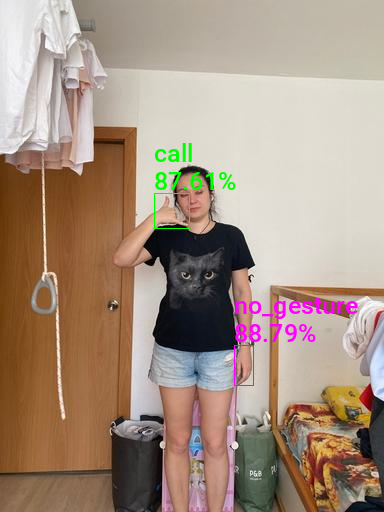

In [98]:
# Create a copy of the test image
annotated_img = test_img.copy()

# Create a drawing context for the annotated image
draw = ImageDraw.Draw(annotated_img)

# Set the font size for the labels
fnt_size = 25

# Loop over the indices of the proposals that were selected by the non-max suppression algorithm
for i in proposal_indices:
    # Get the bounding box coordinates, label, and confidence score of the ith proposal
    x, y, w, h, l, p = proposals[i].values()

    # Compute the shape of the bounding box
    shape = (x, y, x+w, y+h)

    # Get the color for the ith proposal's label
    color = tuple([int(ch*255) for ch in colors[proposals[i]['label']]])

    # Draw the bounding box on the annotated image using the computed shape and color
    draw.rectangle(shape, outline=color)

    # Create a font object using the selected font and font size
    fnt = PIL.ImageFont.truetype("KFOlCnqEu92Fr1MmEU9vAw.ttf", fnt_size)

    # Draw the label and confidence score on the annotated image using the font, color, and bounding box coordinates
    draw.multiline_text((x, y-fnt_size*2-5), f"{labels[l]}\n{p*100:.2f}%", font=fnt, fill=color)

# Print the size of the annotated image
print(annotated_img.size) 

# Display the annotated image
annotated_img

**Benchmark OpenVINO IR CPU inference speed**

In [100]:
%%timeit
# Time how long it takes to run the compiled model on the input image
# and extract the output from the specified layer
compiled_model_ir([input_image])[output_layer_ir]

12 ms ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Create JSON color map**

In [107]:
# Initialize the color map with an empty list of items
color_map = {'items': list()}

# Populate the color map with the labels and colors
color_map['items'] = [{'label': label, 'color': color} for label, color in zip(labels, colors)]

# Print the color map
color_map

{'items': [{'label': 'call', 'color': [0.0, 1.0, 0.0]},
  {'label': 'no_gesture', 'color': [1.0, 0.0, 1.0]},
  {'label': 'dislike', 'color': [0.0, 0.5, 1.0]},
  {'label': 'fist', 'color': [1.0, 0.5, 0.0]},
  {'label': 'four', 'color': [0.5, 0.75, 0.5]},
  {'label': 'like', 'color': [0.32114, 0.03531, 0.64056]},
  {'label': 'mute', 'color': [0.8083, 0.00115, 0.02081]},
  {'label': 'ok', 'color': [0.02177, 0.42475, 0.33483]},
  {'label': 'one', 'color': [0.72261, 0.47583, 0.99531]},
  {'label': 'palm', 'color': [0.99715, 0.97599, 0.25699]},
  {'label': 'peace', 'color': [0.0, 1.0, 1.0]},
  {'label': 'peace_inverted', 'color': [0.0, 1.0, 0.5]},
  {'label': 'rock', 'color': [0.65521, 0.34251, 0.38036]},
  {'label': 'stop', 'color': [0.96712, 0.62955, 0.52852]},
  {'label': 'stop_inverted', 'color': [0.48445, 0.84111, 0.01565]},
  {'label': 'three', 'color': [0.0, 0.0, 1.0]},
  {'label': 'three2', 'color': [0.54362, 0.96123, 0.9046]},
  {'label': 'two_up', 'color': [0.36779, 0.44128, 0.0005

**Export color map**

In [108]:
# Import the json module
import json

# Set the name of the file to which the color map will be written
color_map_file_name = f"{dataset_path.name}-colormap.json"

# Open the file in write mode
with open(color_map_file_name, "w") as write_file:
    # Write the color map to the file as JSON
    json.dump(color_map, write_file)
    
# Print the name of the file that the color map was written to
print(color_map_file_name)

hagrid-sample-30k-384p-colormap.json


**Export color map for C++ command-line demo**

In [109]:
# Set the names of the files to which the labels and colors will be written
labels_cpp_file_name = f'{dataset_path.name}-labels-cpp.txt'
colormap_cpp_file_name = f'{dataset_path.name}-colormap-cpp.txt'

# Open the labels file in write mode
with open(labels_cpp_file_name, "w") as write_file:
    # Write the labels to the file
    write_file.write(str(labels).replace("'", '"').replace("[", '{').replace("]", '}'))

# Open the colors file in write mode
with open(colormap_cpp_file_name, "w") as write_file:
    # Write the colors to the file
    write_file.write(str(colors).replace("'", '"').replace("[", '{').replace("]", '}'))